In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
before_df = pd.read_csv("[NoPK] neo4j-vector_v3.csv")
after_df = pd.read_csv("[NoPK] neo4j-vector_v3-sys.csv")
sec_df = pd.read_csv("[NoPK] neo4j-vector_v3-sys-2.csv")

# llama2_df = pd.read_csv("[prior-knowledge] llama2.csv")
# chatgpt_df = pd.read_csv("[prior-knowledge] chatgpt.csv")
# neo4jvector_df = pd.read_csv("[prior-knowledge] neo4j-vector.csv")
# no_prior_knowledge_df = pd.read_csv("[NoPK] neo4j-vector.csv")
# adjusted_prompt_df=  pd.read_csv('[NoPK] neo4j-vector-adjusted-prompt.csv')

# attributes -> symptoms/clinical signs/laboratory data/clinical characteristics/clinical history

<Axes: >

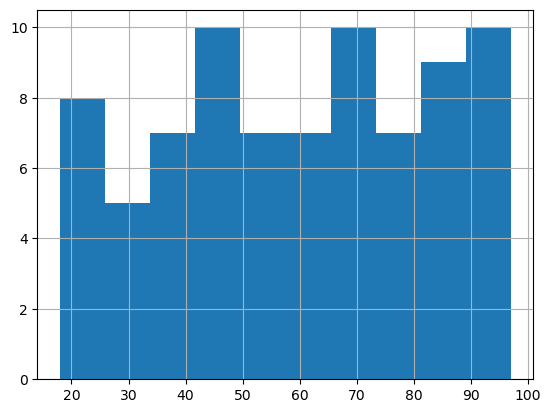

In [3]:
after_df['age'].hist()

<Axes: >

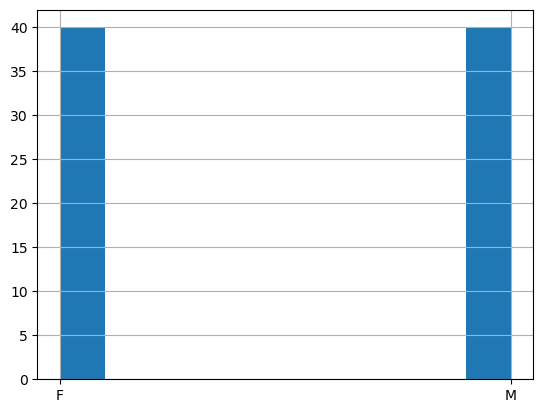

In [4]:
after_df['gender'].hist()

In [5]:
identified_keywords = {  # Neo4jVector
    "boolean": [
        "anesthesia",
        "asthma",
        "asymptomatic",
        "breathing difficulty",
        "chest pain",
        "chronic obstructive pulmonary disease",
        "cough",
        "cyanosis",
        "fever",
        "pleural effusion",
        "pulmonary tuberculosis",
        "small volume linear shadows",
        "smoking"
        # Response: Risk factors for atelectasis include certain types of surgery, muscle relaxation, obesity, high oxygen, and lower lung segments.',
        # "high oxygen",  # A cause, not a symptom. Has the patient been the situation with high oxygen. # remove this for not causing confusion to LLMs.

    ],

    "numerical": [
        "heart rate (per minute)",  # "increased heart rate",
        "oxygen saturation (%)",  # "low oxygen saturation",
    ],
    # 'old age', # already provided in the report.
}

In [6]:
all_aug_keywords = identified_keywords['boolean'] + identified_keywords['numerical']

In [7]:
from typing import Any
def get_same_v_cols(df: pd.DataFrame, cols_to_check: list[str])-> dict[str, Any]:
    same_v_cols = {}
    for col in cols_to_check:
        all_k = list(dict(df[col].value_counts()).keys())
        if len(all_k) == 1:
            same_v_cols[col] = all_k[0]
    return same_v_cols

In [8]:
after_df['Atelectasis'].value_counts()

Atelectasis
0.0    65
4.0    10
5.0     5
Name: count, dtype: int64

In [9]:
after_same_v= get_same_v_cols(after_df, cols_to_check=all_aug_keywords)
after_same_v

{'cyanosis': False}

In [10]:
before_same_v= get_same_v_cols(before_df, cols_to_check=all_aug_keywords)
before_same_v

{'anesthesia': False, 'cyanosis': False, 'small volume linear shadows': True}

In [11]:
# proving that they are from different df, just owing same same_v cols.
(   
    before_df["oxygen saturation (%)"].mean(),
    after_df["oxygen saturation (%)"].mean(),
    sec_df["oxygen saturation (%)"].mean(),
)
# they have different mean value for oxygen saturation

(95.85, 95.6875, 95.8)

In [12]:
before_df['has_atelectasis'] = before_df['Atelectasis'] > 0
after_df['has_atelectasis'] = after_df['Atelectasis'] > 0
sec_df['has_atelectasis'] = sec_df['Atelectasis'] > 0

In [13]:
# neo4jvector_df['has_atelectasis'] = neo4jvector_df['Atelectasis'] >0

In [14]:
before_df["res_type"] = "Before"
# after_df["res_type"] = "After"
sec_df["res_type"] = "After"

In [29]:
all_age_gaps = [18, 30, 40, 50, 60, 70, 80, 90, 100]
def get_age_section(age):
    if 18 <= age and age < 30:
        return '18-30'
    elif  30 <= age and age <40:
        return '30-40'
    elif  40 <= age and age < 50:
        return '40-50'
    elif  50 <= age and age <60:
        return '50-60'
    elif  60 <= age and age <70:
        return '60-70'
    elif  70 <= age and age <80:
        return '70-80'
    elif  80 <= age and age <90:
        return '80-90'
    elif  90 <= age and age <100:
        return '90-100'
    else:
        raise ValueError(f"Age: {age}, not in the sampling range.")
    
    
    
    
    

In [30]:
sec_df['age_sec'] = sec_df['age'].apply(get_age_section)

<Axes: xlabel='age_sec', ylabel='count'>

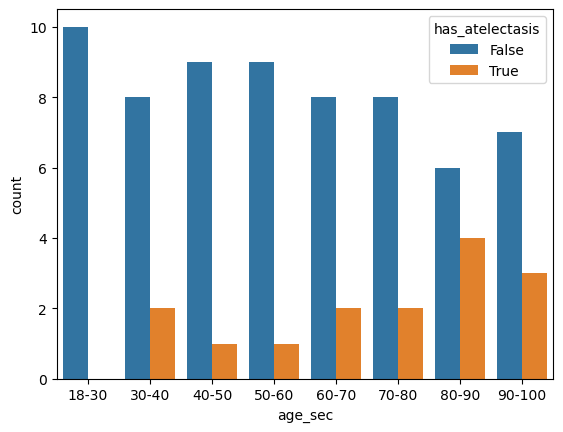

In [32]:
sns.countplot(data=sec_df, x="age_sec", hue='has_atelectasis')

<Axes: xlabel='age_sec', ylabel='has_atelectasis'>

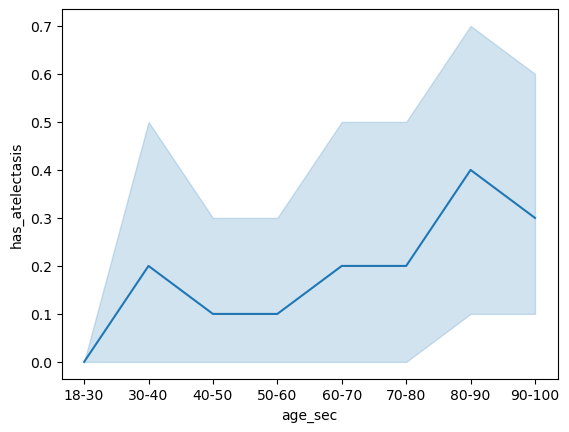

In [41]:
sns.lineplot(data=sec_df, x="age_sec", y="has_atelectasis")

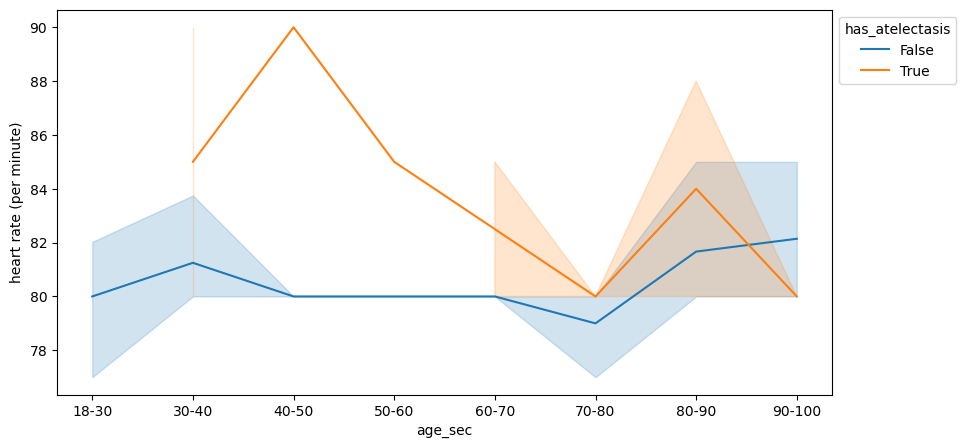

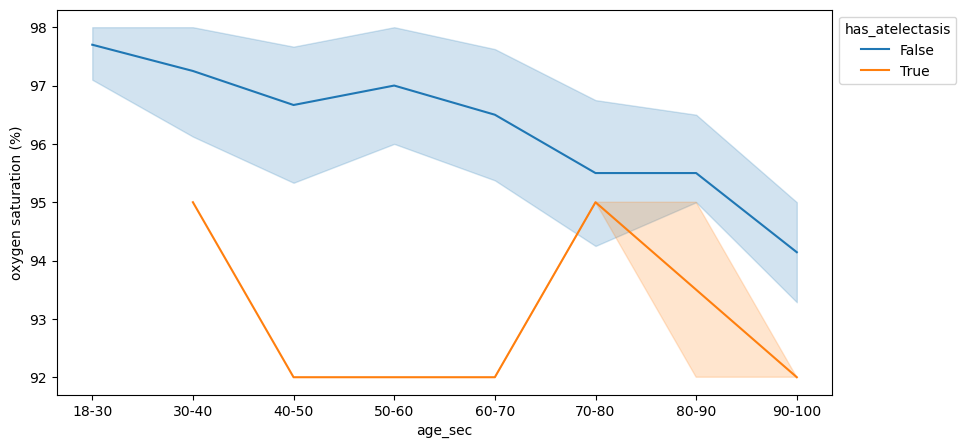

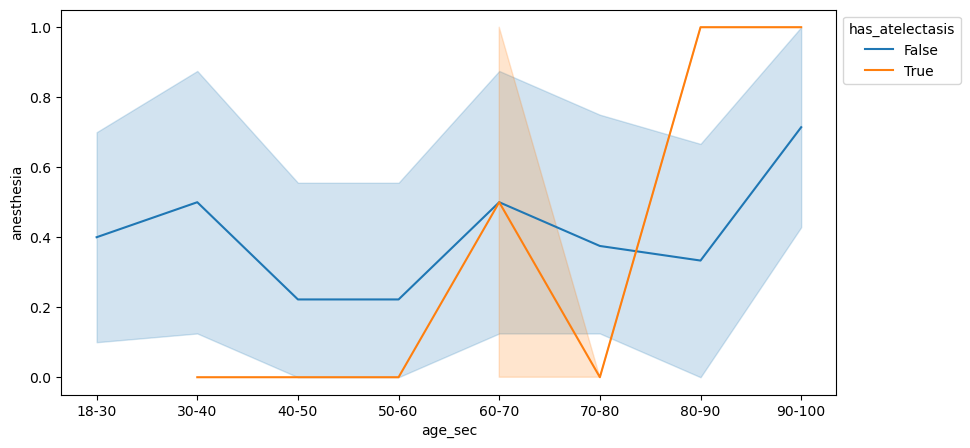

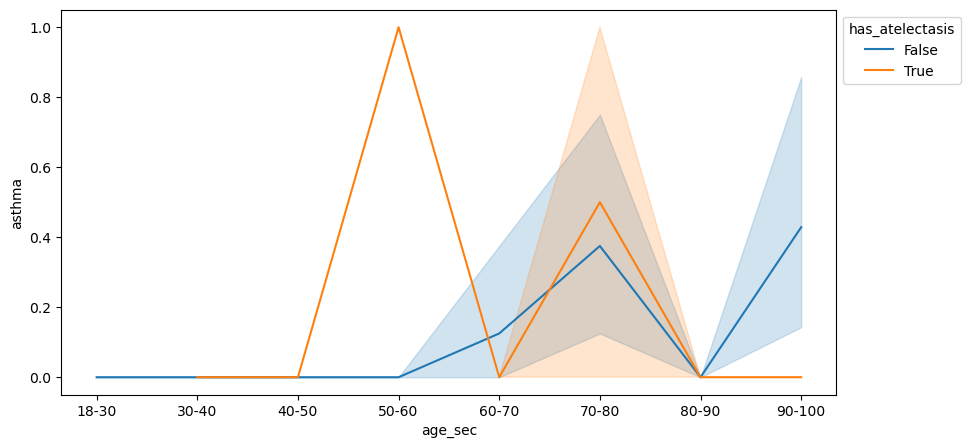

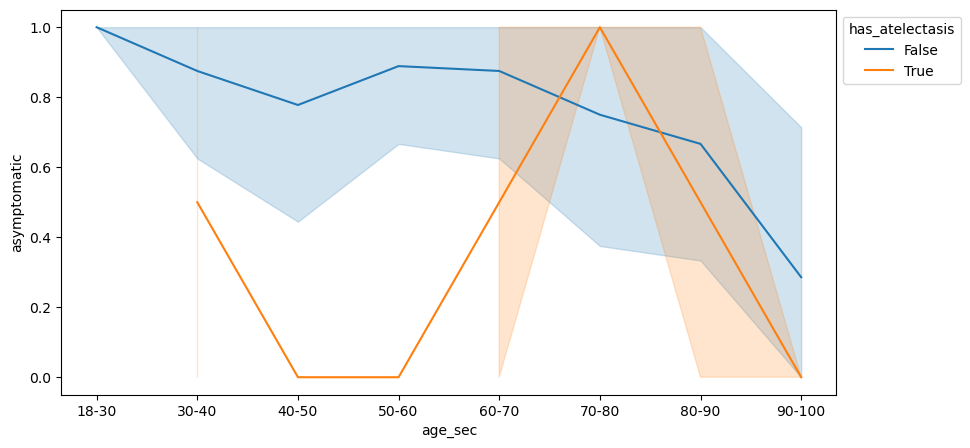

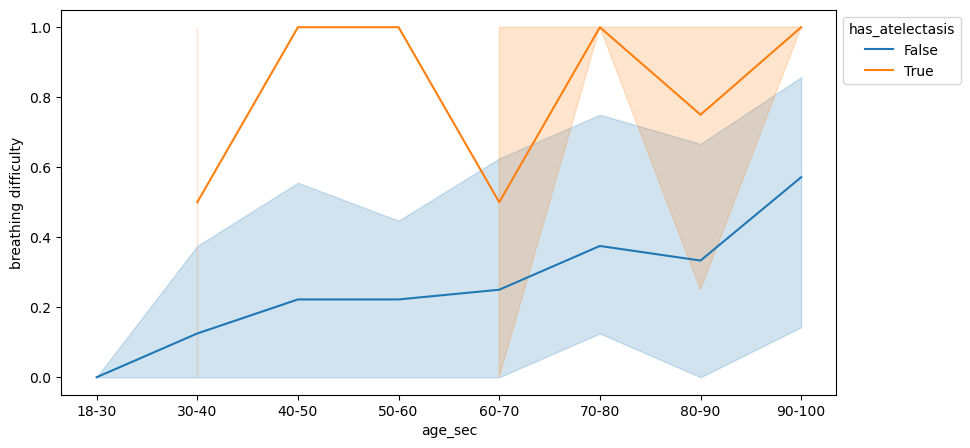

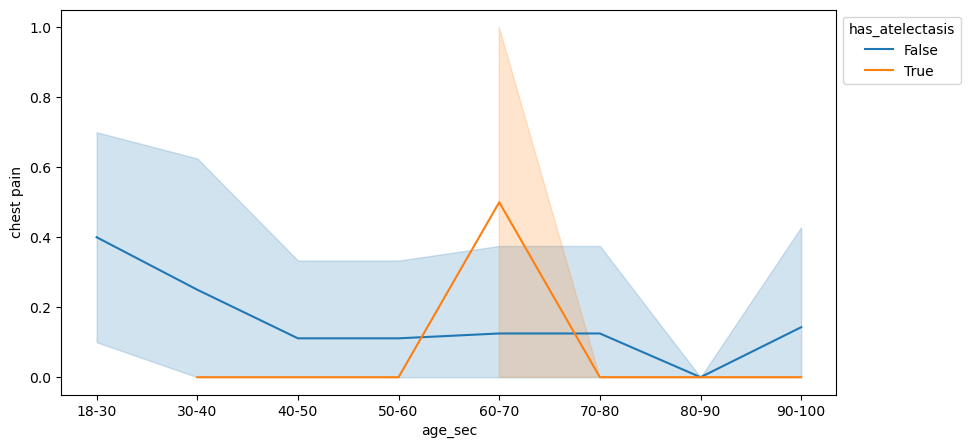

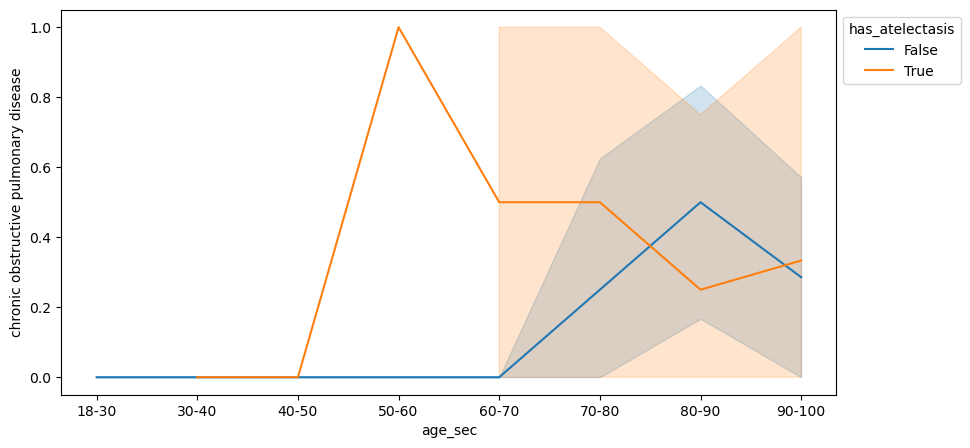

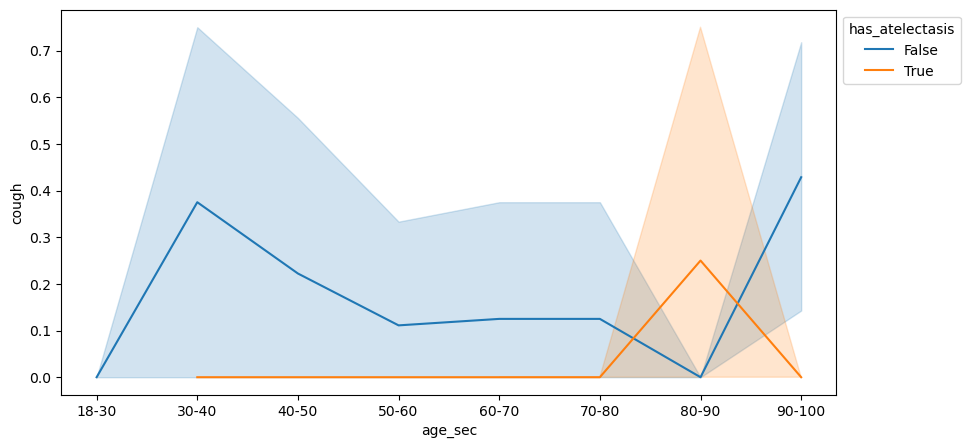

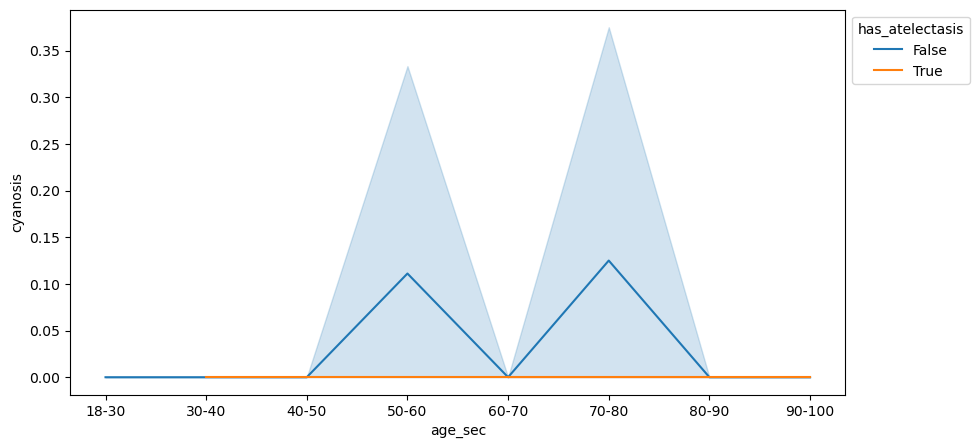

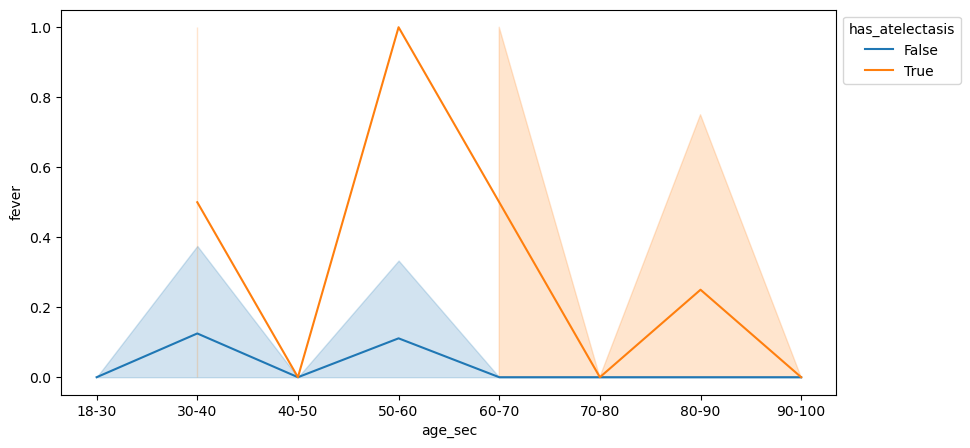

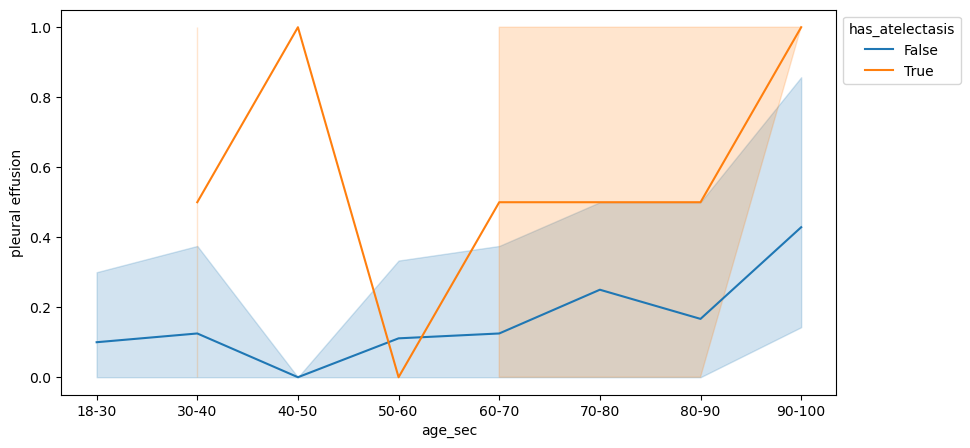

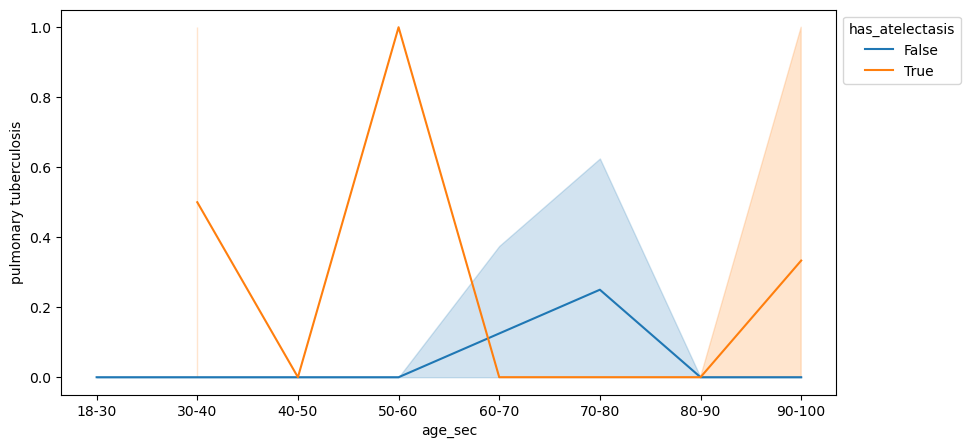

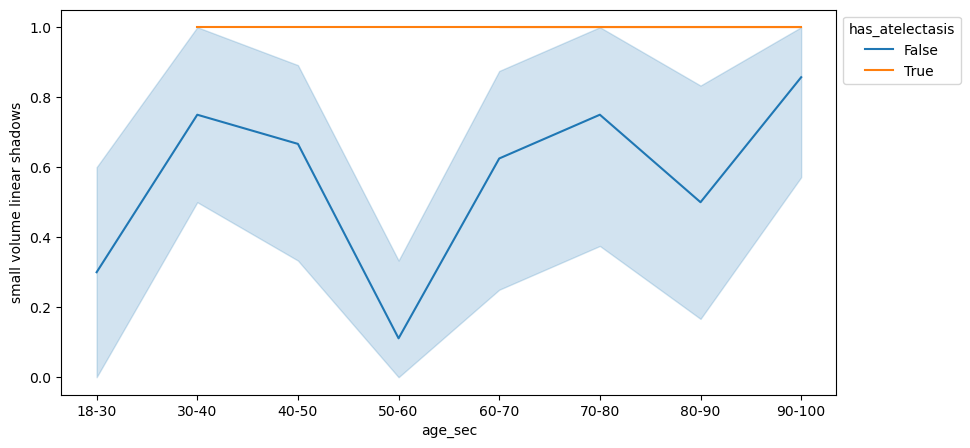

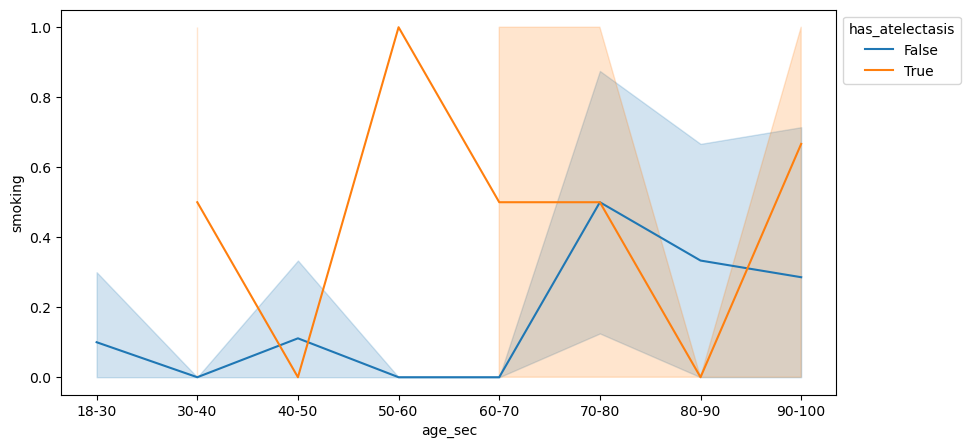

In [46]:
for f in [
    "heart rate (per minute)",
    "oxygen saturation (%)",
    "anesthesia",
    "asthma",
    "asymptomatic",
    "breathing difficulty",
    "chest pain",
    "chronic obstructive pulmonary disease",
    "cough",
    "cyanosis",
    "fever",
    "pleural effusion",
    "pulmonary tuberculosis",
    "small volume linear shadows",
    "smoking",
]:
    # fig, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 5))
    plt.figure(figsize=(10, 5))
    # ax = sns.lineplot(data=sec_df, x="age_sec", hue="atelectasis", y=f)
    ax = sns.lineplot(data=sec_df, x="age_sec", y=f, hue="has_atelectasis")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig(f"./age_x/{f}-hue.png")
    # sns.lineplot(data=sec_df, x="age_sec", y="asthma", hue="has_atelectasis")

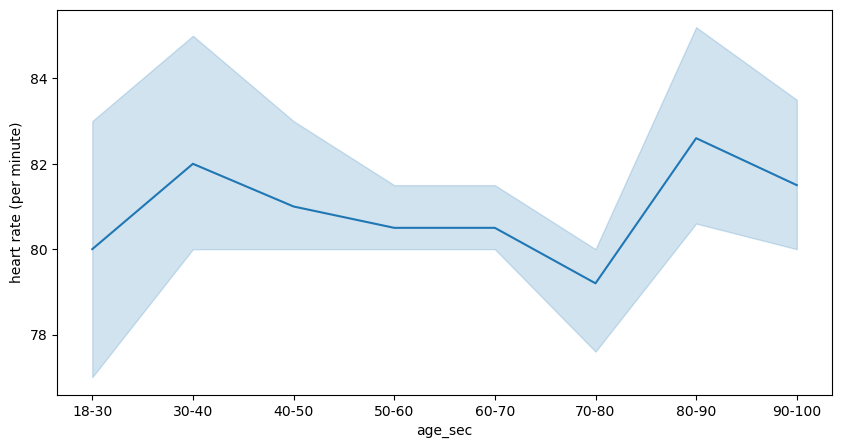

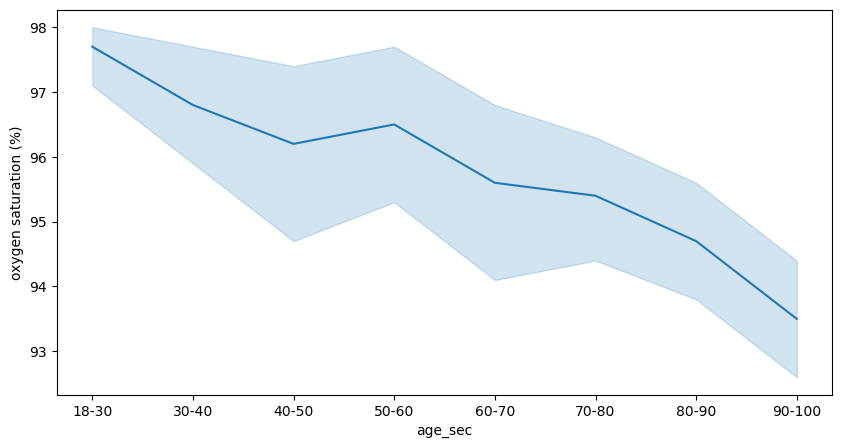

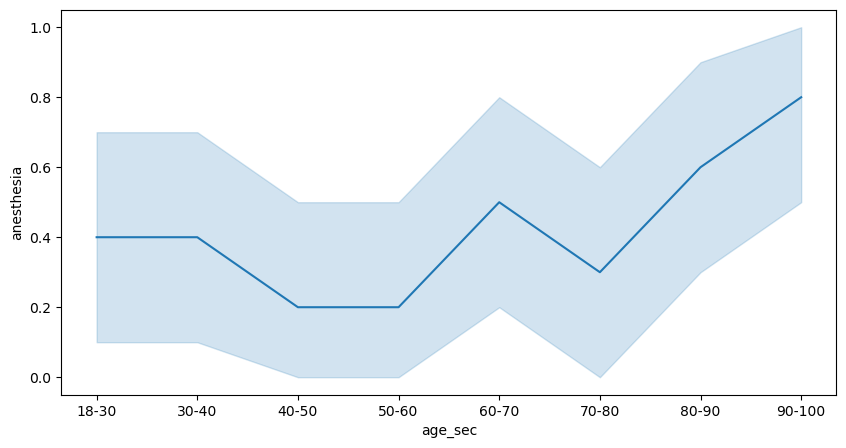

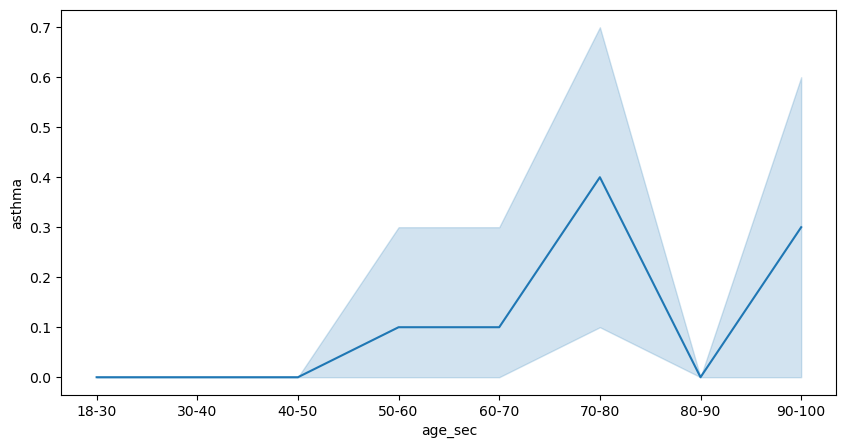

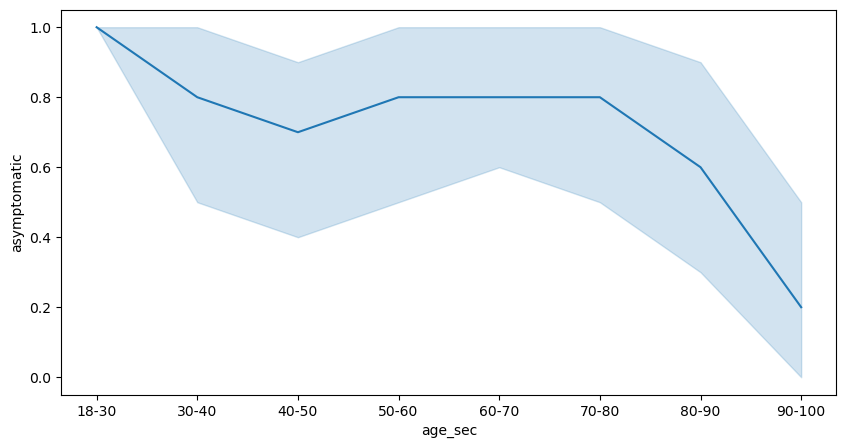

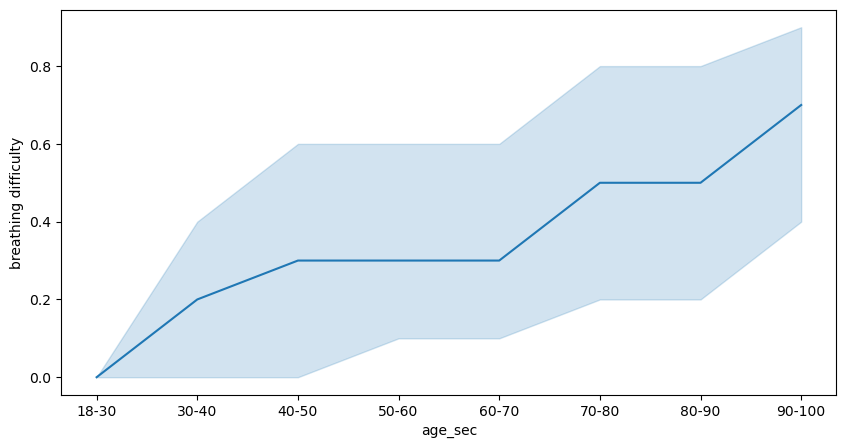

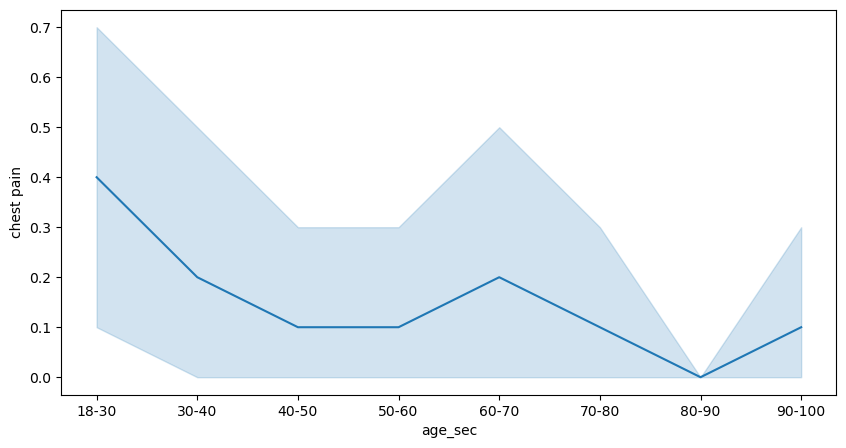

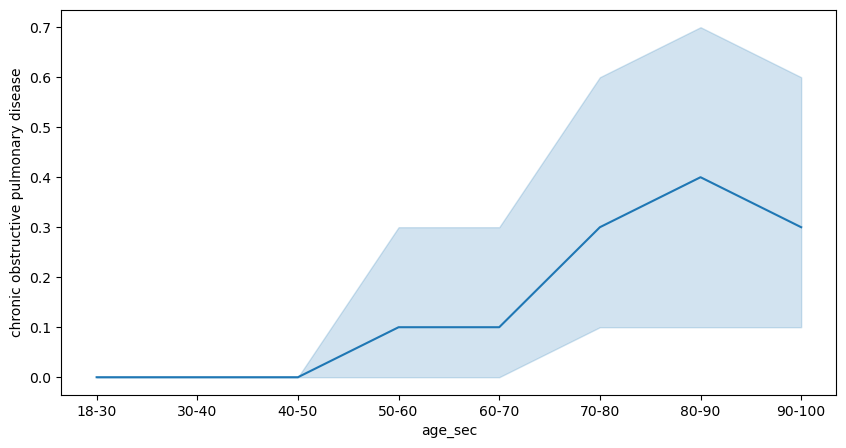

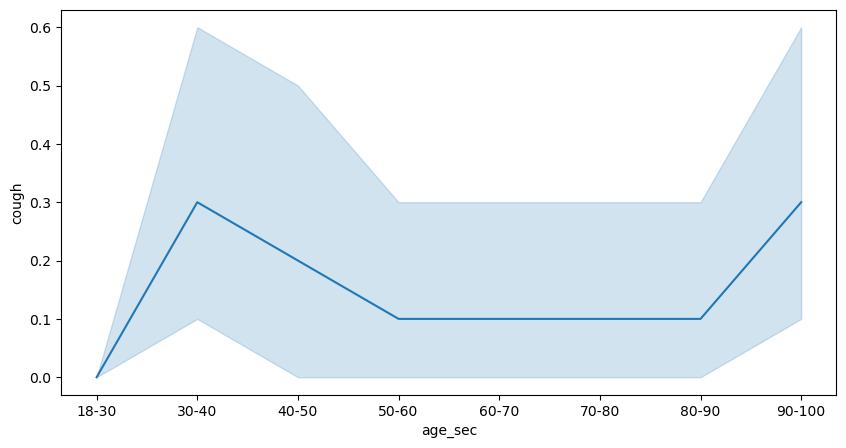

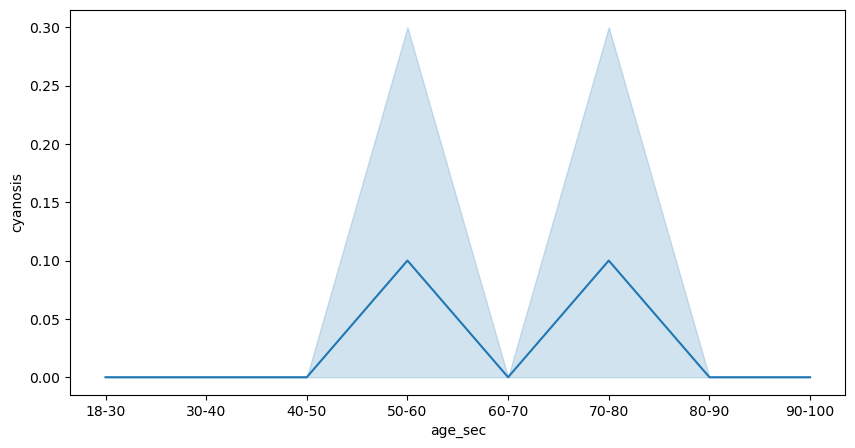

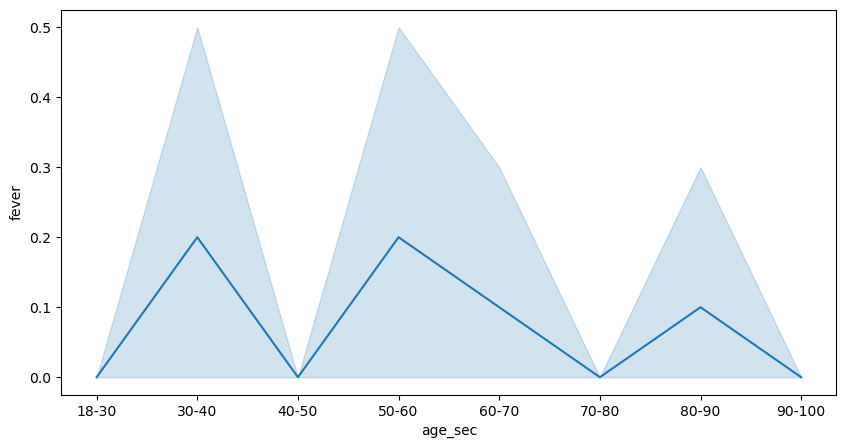

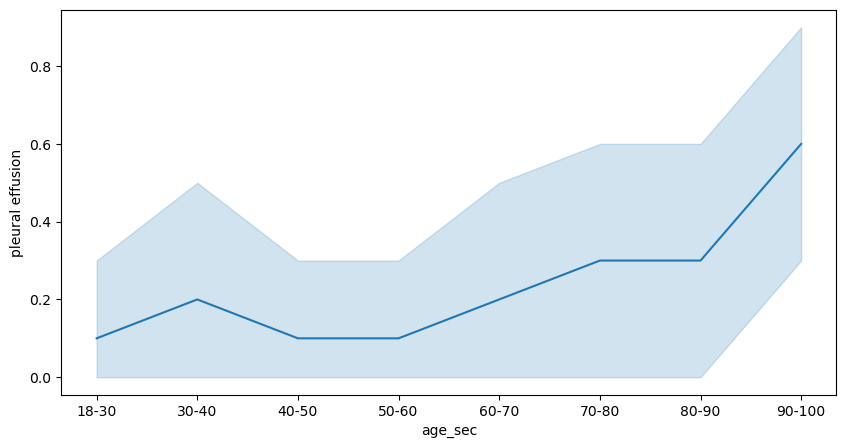

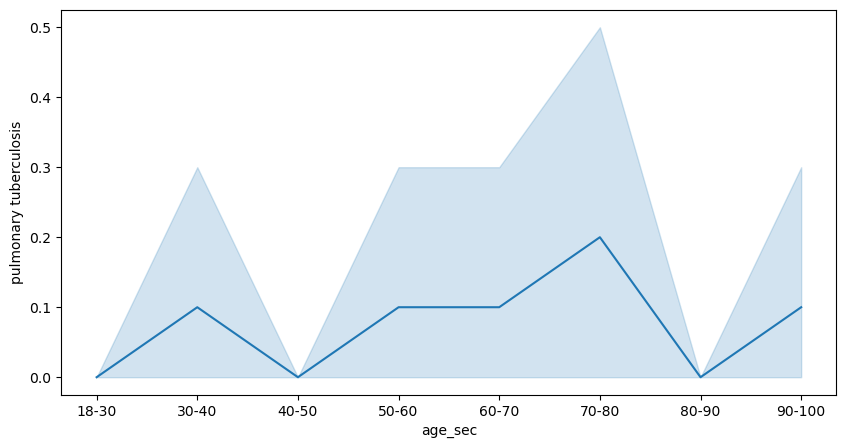

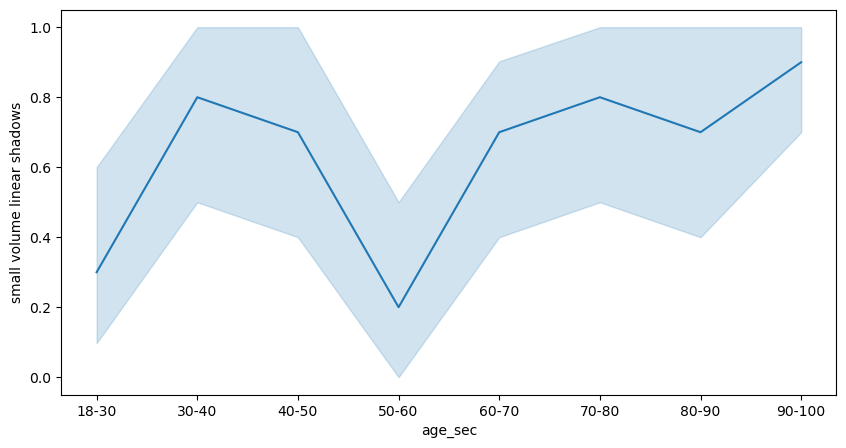

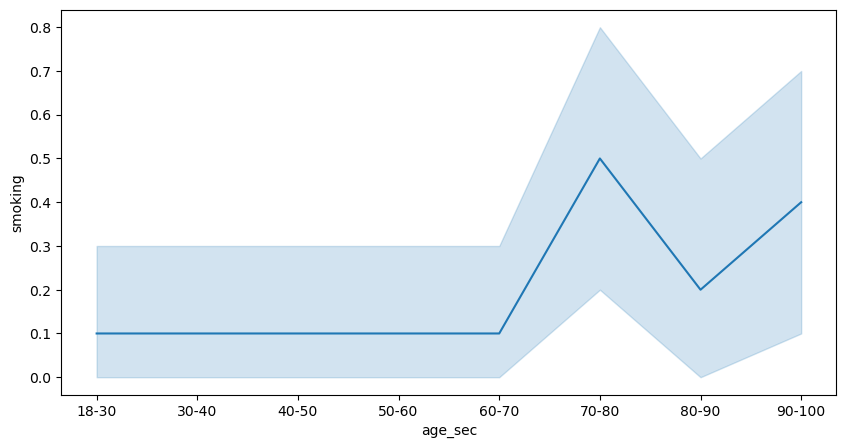

In [44]:
for f in [
    "heart rate (per minute)",
    "oxygen saturation (%)",
    "anesthesia",
    "asthma",
    "asymptomatic",
    "breathing difficulty",
    "chest pain",
    "chronic obstructive pulmonary disease",
    "cough",
    "cyanosis",
    "fever",
    "pleural effusion",
    "pulmonary tuberculosis",
    "small volume linear shadows",
    "smoking",
]:
    # fig, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 5))
    plt.figure(figsize=(10, 5))
    ax = sns.lineplot(data=sec_df, x="age_sec", y=f)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig(f'./age_x/{f}.png')
    # sns.lineplot(data=sec_df, x="age_sec", y="asthma", hue="has_atelectasis")

In [17]:
merged_df = pd.concat(
    [
        before_df,
        # after_df,
        sec_df,
    ],
    axis=0,
)

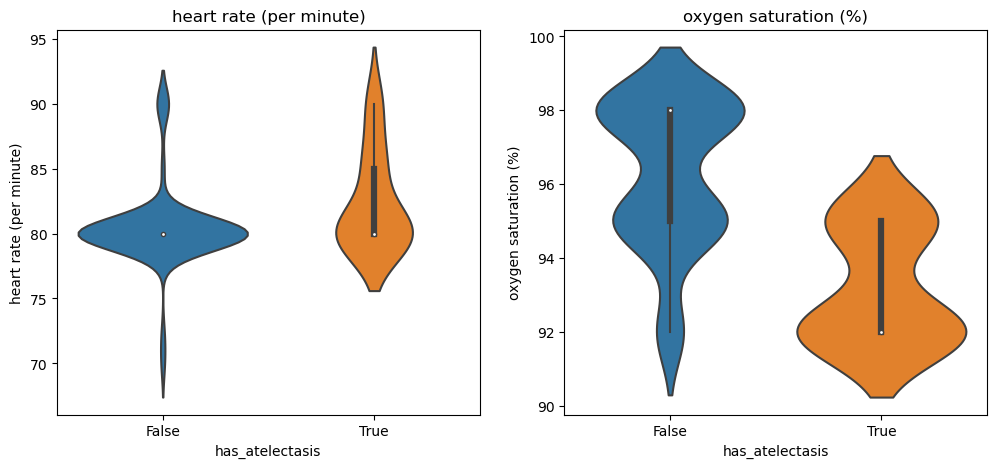

In [30]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 5))
# ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis")
axes[0].set_title("heart rate (per minute)")
axes[1].set_title("oxygen saturation (%)")
# axes[2].set_title("After_2")
ax = sns.violinplot(ax=axes[0], data=after_df, x="has_atelectasis", y="heart rate (per minute)")
# ax = sns.countplot(ax=axes[1], data=after_df, x="has_atelectasis", hue=col)
ax = sns.violinplot(ax=axes[1], data=after_df, x="has_atelectasis", y="oxygen saturation (%)")

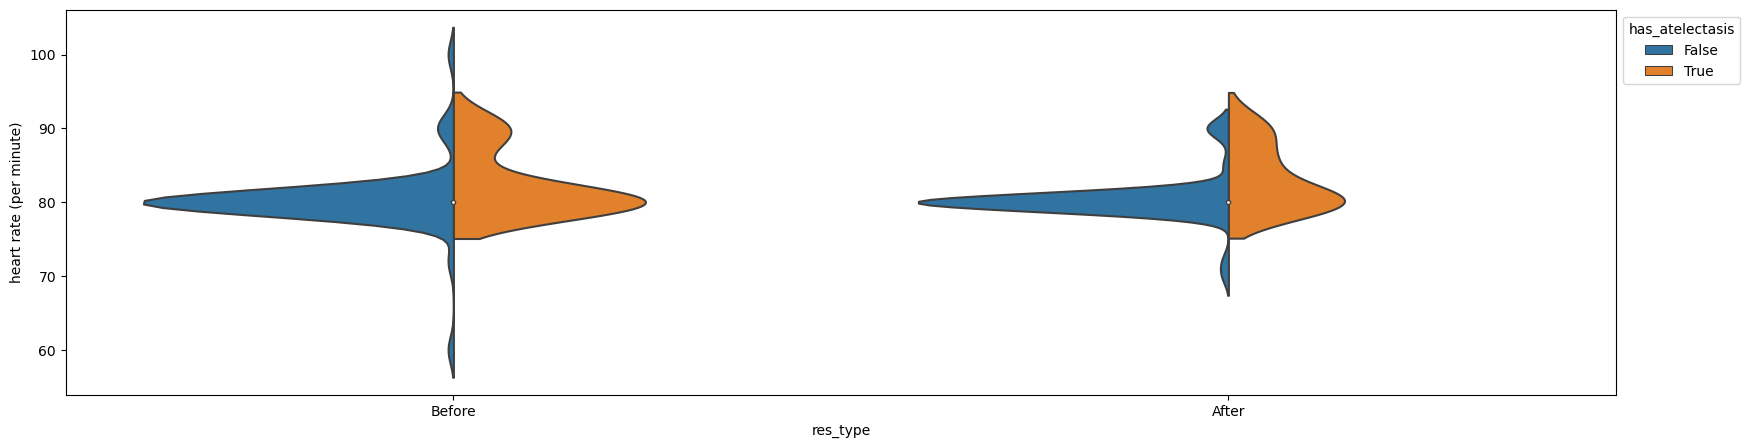

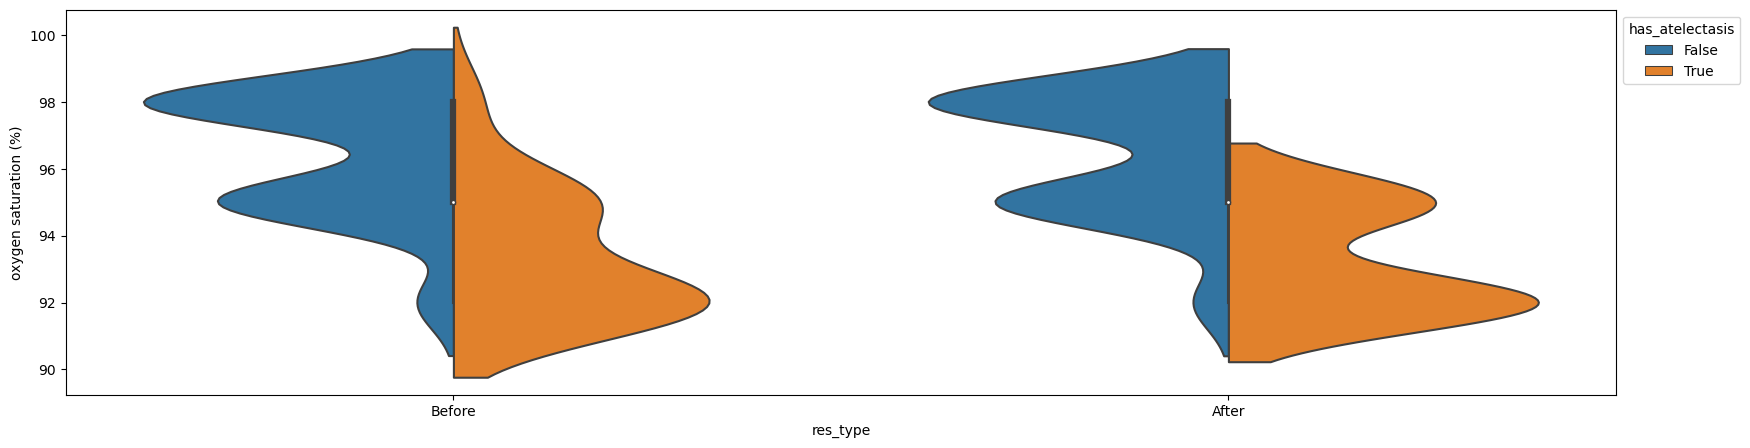

In [22]:
for col in identified_keywords['numerical']:
    plt.figure(figsize=(20,5))
    ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis", split=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

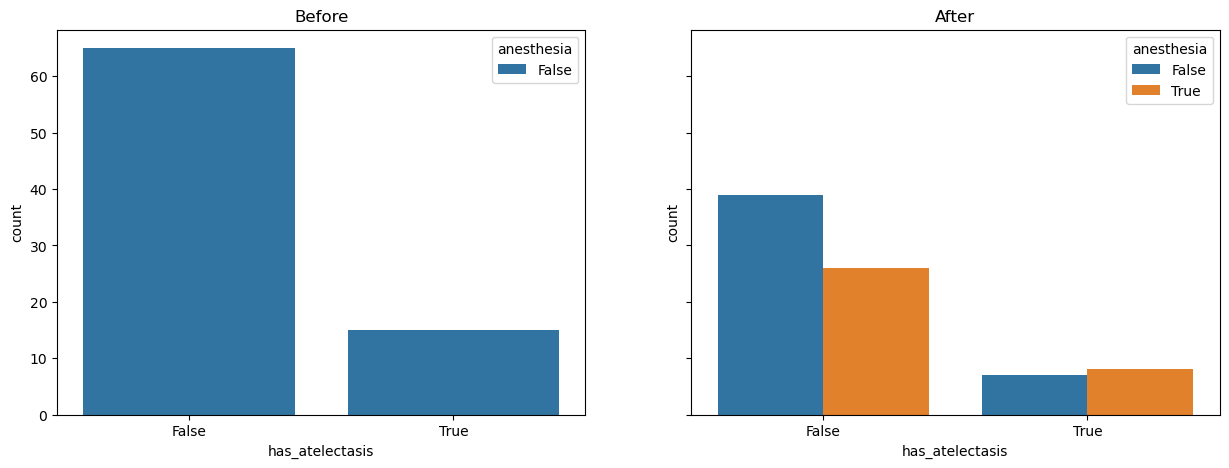

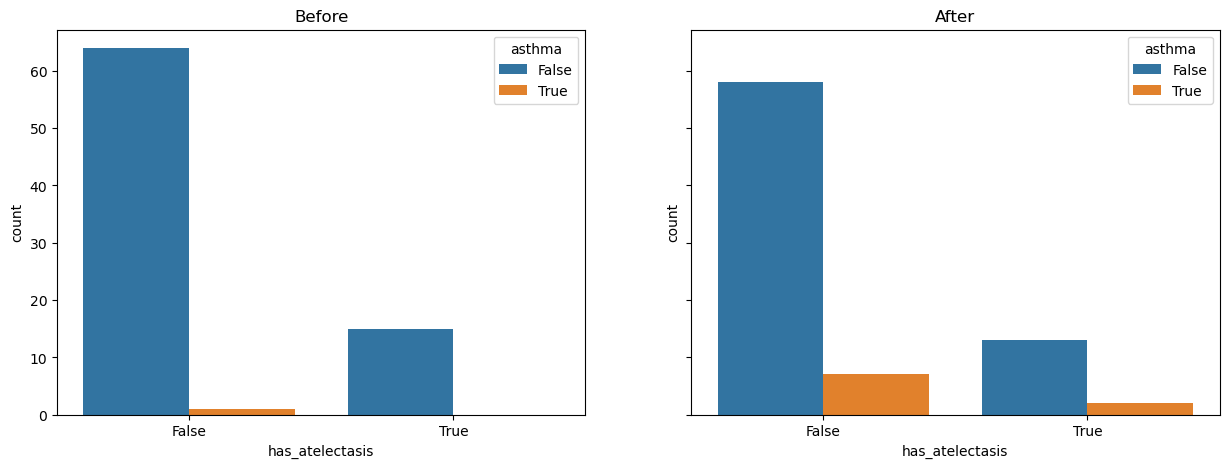

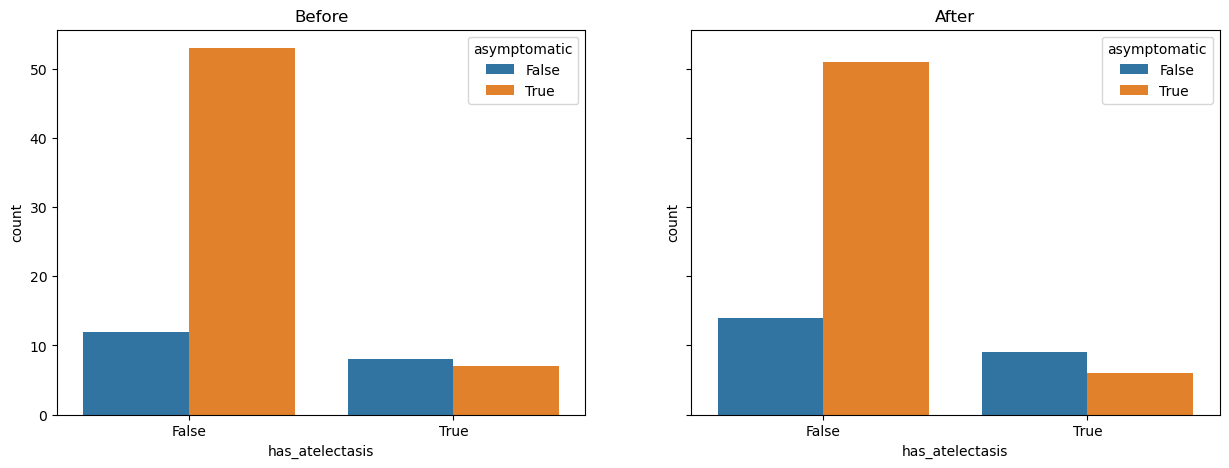

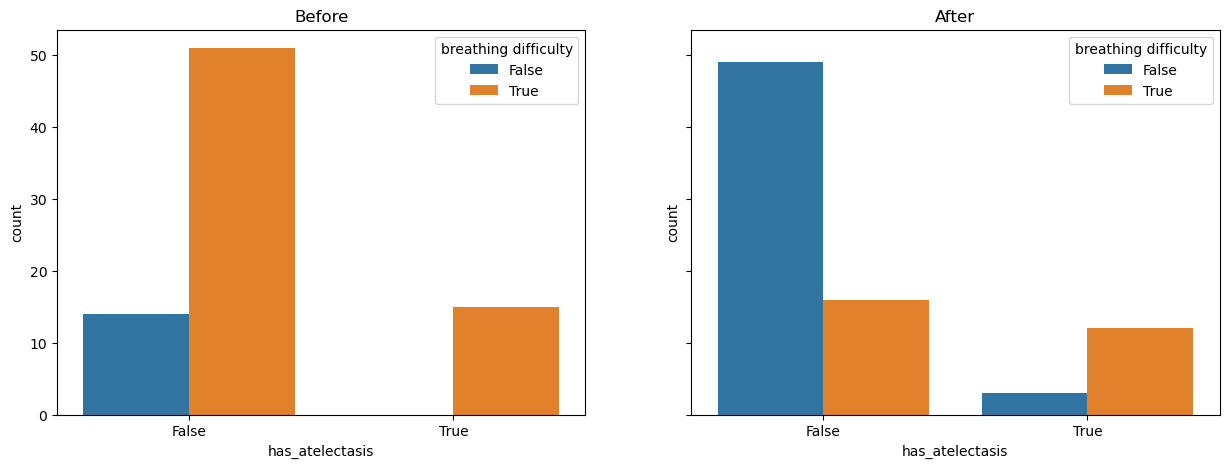

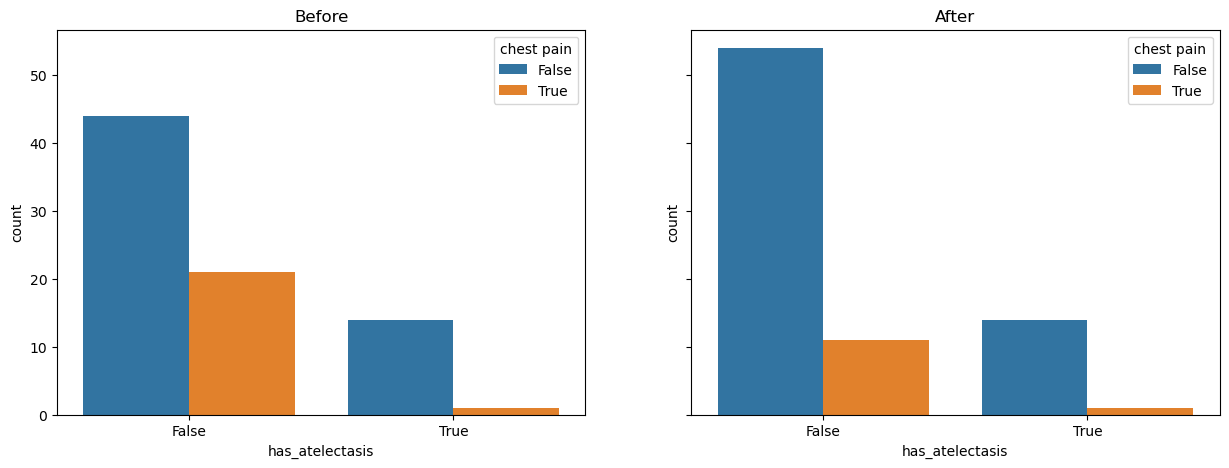

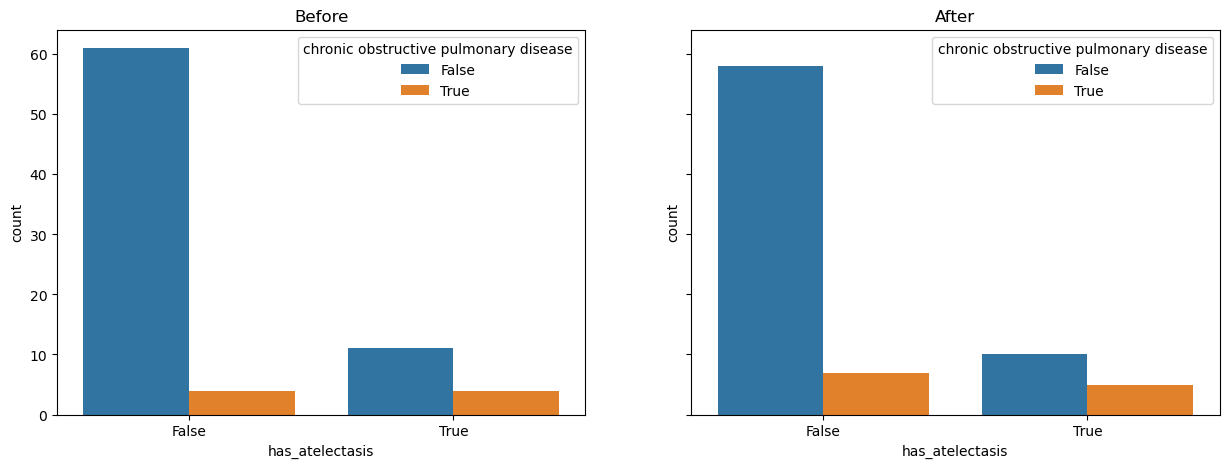

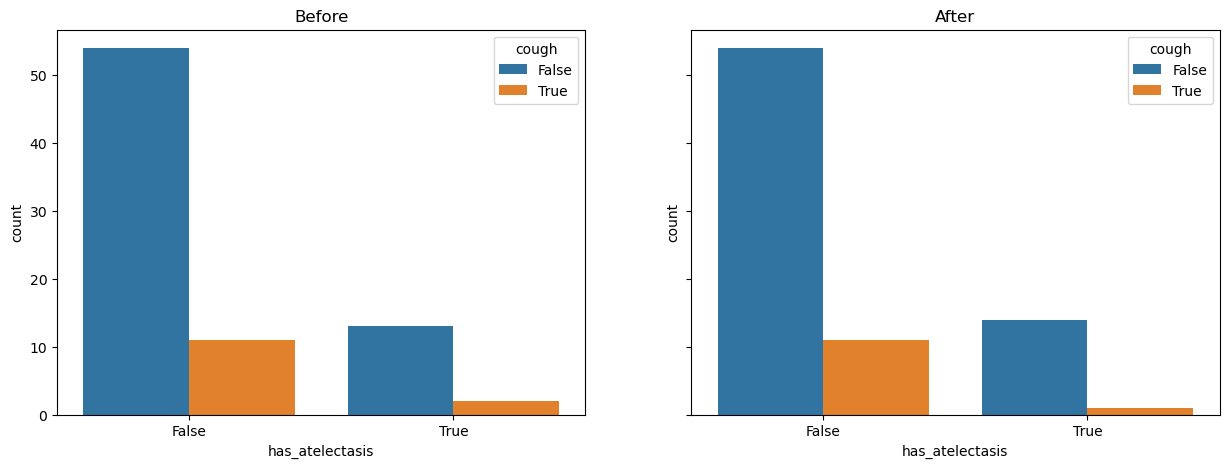

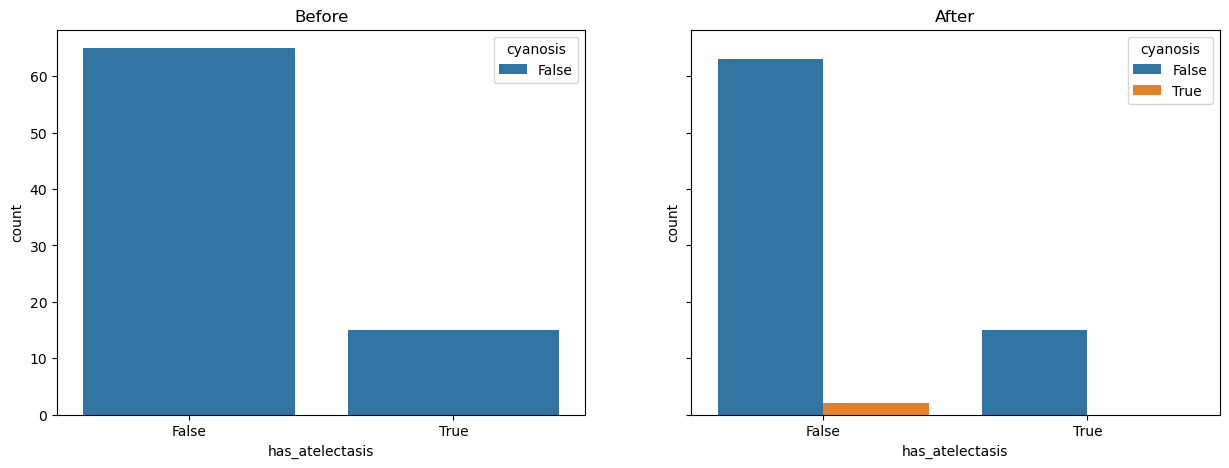

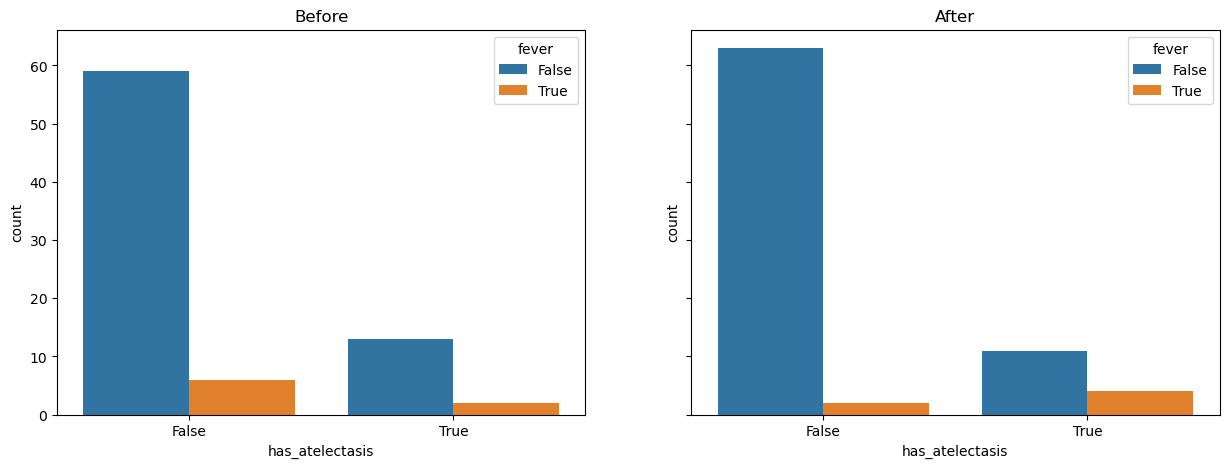

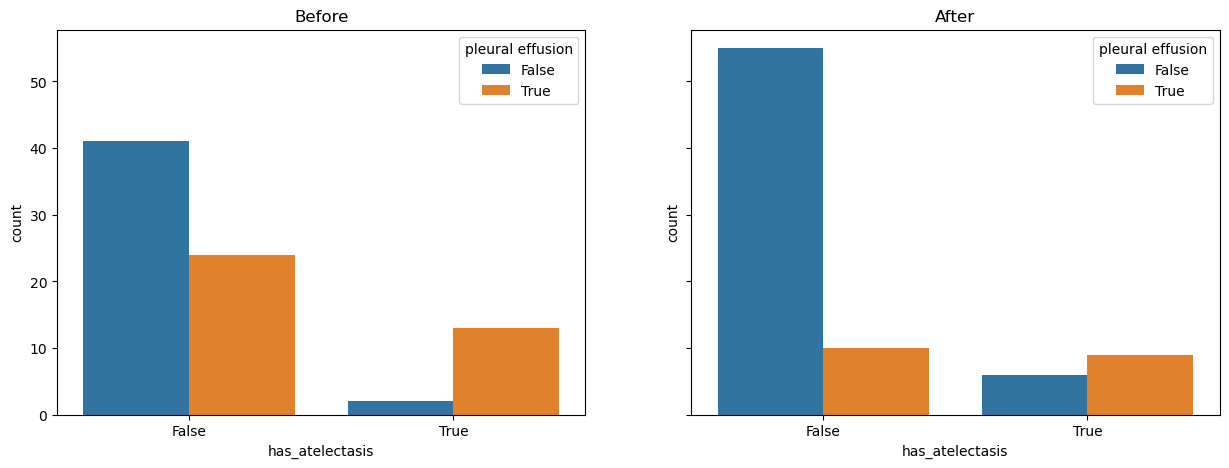

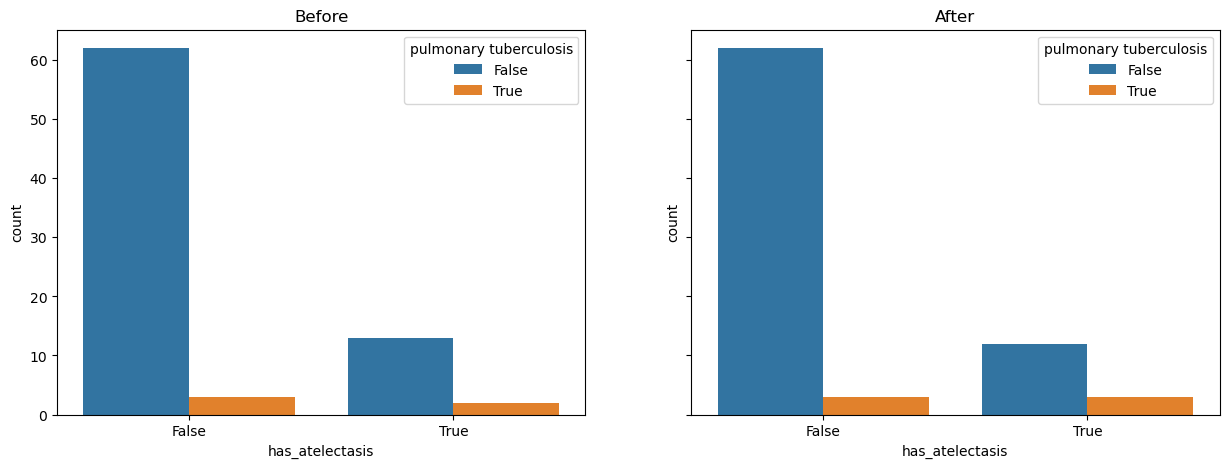

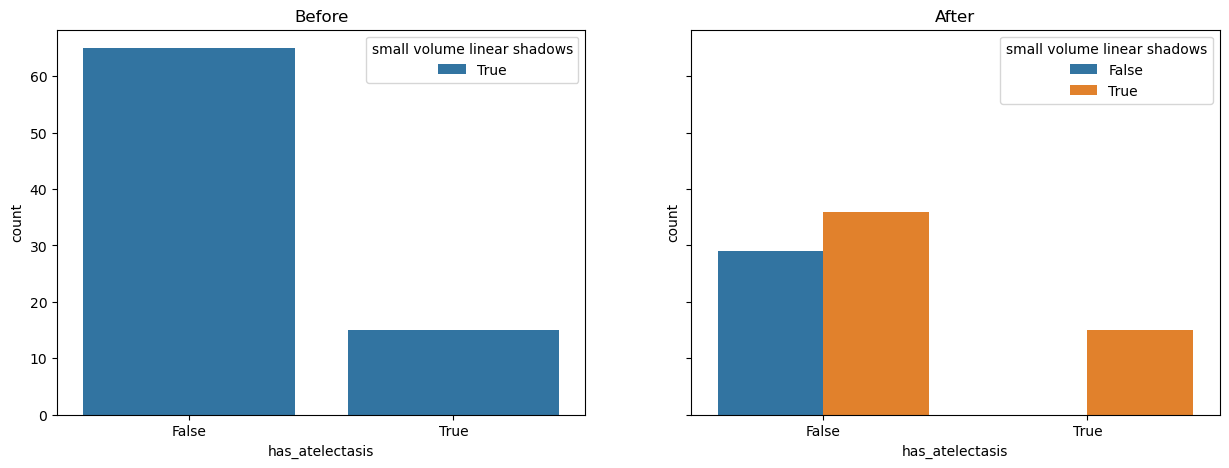

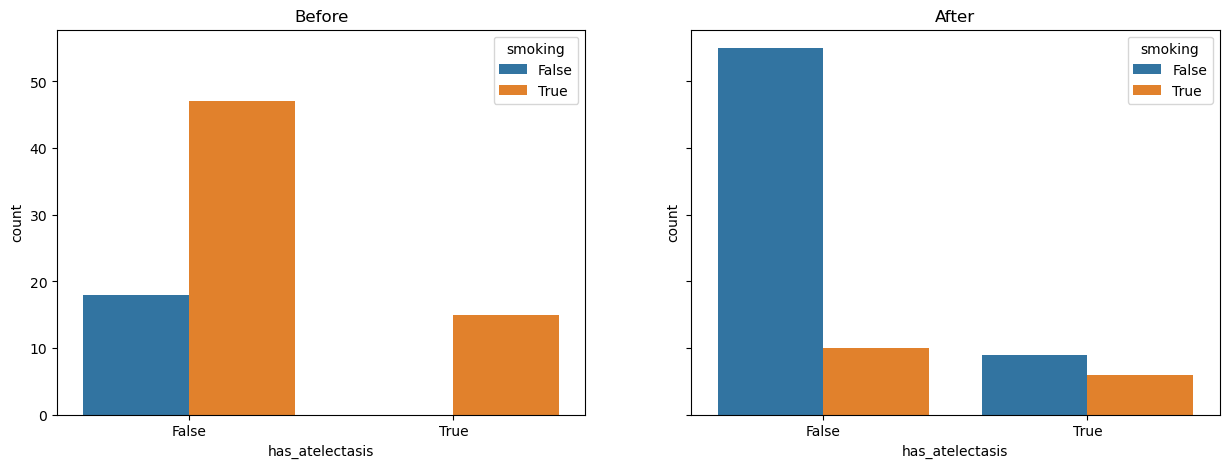

In [23]:
for col in identified_keywords["boolean"]:
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
    # ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis")
    axes[0].set_title("Before")
    axes[1].set_title("After")
    # axes[2].set_title("After_2")
    ax = sns.countplot(ax=axes[0], data=before_df, x="has_atelectasis", hue=col)
    # ax = sns.countplot(ax=axes[1], data=after_df, x="has_atelectasis", hue=col)
    ax = sns.countplot(ax=axes[1], data=sec_df, x="has_atelectasis", hue=col)

    # for container in ax.containers:
    #     ax.bar_label(container)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [53]:
no_at = after_df[~after_df['has_atelectasis']] # possibility of having each lesion.
has_at = after_df[after_df['has_atelectasis']]

portion_dict = {
    "no_at":{},
    "has_at": {}
}

for k in identified_keywords['boolean']:
    portion_dict['no_at'][k] = no_at[k].sum()/len(no_at)
    portion_dict['has_at'][k] = has_at[k].sum()/len(has_at)


In [89]:
port_df = pd.DataFrame(portion_dict)

In [90]:
port_df

,no_at,has_at
anesthesia,0.384615,0.733333
asthma,0.107692,0.066667
asymptomatic,0.753846,0.133333
breathing difficulty,0.261538,0.800000
chest pain,0.184615,0.066667
chronic obstructive pulmonary disease,0.092308,0.266667
cough,0.123077,0.133333
cyanosis,0.000000,0.000000
fever,0.061538,0.133333
pleural effusion,0.153846,0.666667


In [102]:
no_at_df = pd.DataFrame(port_df['no_at'])
no_at_df['has_atelectasis'] = False

In [103]:
no_at_df.columns = ["portion", "has_atelectasis"]

In [104]:
no_at_df

,portion,has_atelectasis
anesthesia,0.384615,False
asthma,0.107692,False
asymptomatic,0.753846,False
breathing difficulty,0.261538,False
chest pain,0.184615,False
chronic obstructive pulmonary disease,0.092308,False
cough,0.123077,False
cyanosis,0.000000,False
fever,0.061538,False
pleural effusion,0.153846,False


In [105]:
has_at_df = pd.DataFrame(port_df['has_at'])
has_at_df['has_atelectasis'] = True

In [106]:
has_at_df.columns = ["portion", "has_atelectasis"]

In [107]:
has_at_df

,portion,has_atelectasis
anesthesia,0.733333,True
asthma,0.066667,True
asymptomatic,0.133333,True
breathing difficulty,0.800000,True
chest pain,0.066667,True
chronic obstructive pulmonary disease,0.266667,True
cough,0.133333,True
cyanosis,0.000000,True
fever,0.133333,True
pleural effusion,0.666667,True


In [108]:
plot_df = pd.concat([no_at_df, has_at_df])

In [109]:
plot_df

,portion,has_atelectasis
anesthesia,0.384615,False
asthma,0.107692,False
asymptomatic,0.753846,False
breathing difficulty,0.261538,False
chest pain,0.184615,False
chronic obstructive pulmonary disease,0.092308,False
cough,0.123077,False
cyanosis,0.000000,False
fever,0.061538,False
pleural effusion,0.153846,False


In [110]:
plot_df.columns

Index(['portion', 'has_atelectasis'], dtype='object')

In [111]:
plot_df['features'] = plot_df.index

<Axes: xlabel='portion', ylabel='features'>

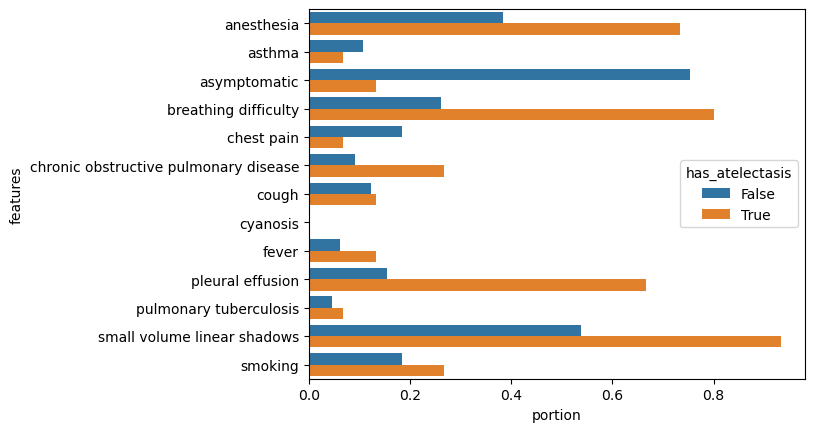

In [113]:
sns.barplot(plot_df, y="features", x="portion", hue="has_atelectasis")

In [83]:
plot_df

,portion,has_atelectasis,features
anesthesia,0.384615,False,anesthesia
asthma,0.107692,False,asthma
asymptomatic,0.753846,False,asymptomatic
breathing difficulty,0.261538,False,breathing difficulty
chest pain,0.184615,False,chest pain
chronic obstructive pulmonary disease,0.092308,False,chronic obstructive pulmonary disease
cough,0.123077,False,cough
cyanosis,0.000000,False,cyanosis
fever,0.061538,False,fever
pleural effusion,0.153846,False,pleural effusion


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,dicom_id,subject_id,stay_id,study_id,split,eye_tracking_data_discarded,...,chronic obstructive pulmonary disease,cough,cyanosis,fever,pleural effusion,pulmonary tuberculosis,small volume linear shadows,smoking,reason,has_atelectasis
13,13,629,709,P300R639549,1572f30c-4ef543e2-9373a922-e322ff64-5709198c,17415273,34991303.0,59004767,train,False,...,False,False,False,False,True,False,False,False,{'anesthesia': 'because the report does not me...,True
18,18,647,727,P300R759531,a586a4ad-997f80a9-38bbdd65-cb92a6cc-51c8520e,17663731,33014387.0,57429537,train,False,...,False,False,False,True,False,False,True,False,"{'anesthesia': ""because the report does not me...",True
20,20,653,736,P300R002525,36e8555c-4a7333dc-4d1b111f-ed37c83a-6e427ed3,17732045,39756103.0,55070682,val,False,...,False,False,False,False,False,False,True,False,{'anesthesia': 'because anesthesia is mentione...,True
25,25,214,239,P300R209784,7bcd081b-869f44f4-57a93477-646a8796-ee97546c,11474065,36836582.0,59083645,val,False,...,False,False,False,False,True,False,True,False,{'anesthesia': 'because the report mentions ch...,True
31,31,628,707,P300R412392,7e9e4d35-62e51509-84ecd770-92aa9cbe-fe2886a5,17377831,30321869.0,58187412,val,False,...,True,False,False,False,True,False,True,True,"{'anesthesia': 'because the report mentions ""m...",True
45,45,667,751,P300R013229,2796ab60-dc63bf11-99a28559-e3dfe7ef-5898c96c,17937834,36990395.0,50329234,train,False,...,False,False,False,False,False,False,True,False,"{'anesthesia': 'because the mention of ""post-s...",True
49,49,83,83,P223R514658,38d11cf4-31201d6b-f761f181-41cb6e56-dd63e24e,11474034,38499921.0,52145448,train,False,...,False,False,False,True,True,False,True,False,"{'anesthesia': ""because there is no mention of...",True
62,62,676,761,P300R801796,8afc3991-7ec1912b-b24d9633-3c4b0f57-17c0e8f4,18087960,39432013.0,59570639,test,False,...,False,False,False,False,True,False,True,False,"{'anesthesia': ""because there is no mention of...",True
66,66,346,389,P300R807488,919158fb-4f0d9b66-46719ab6-5d584449-1a3ad8de,13606683,37869925.0,56883120,test,False,...,True,False,False,False,True,False,True,False,"{'anesthesia': ""because the patient's report d...",True
70,70,487,550,P300R719253,680a1c96-84e022af-11f79d69-54fbcf51-72e34b4d,15455844,36444008.0,55897015,train,False,...,False,False,False,False,False,False,True,True,{'anesthesia': 'because the report does not me...,True


In [ ]:
# AGE (Has atelectasis -> attributes)

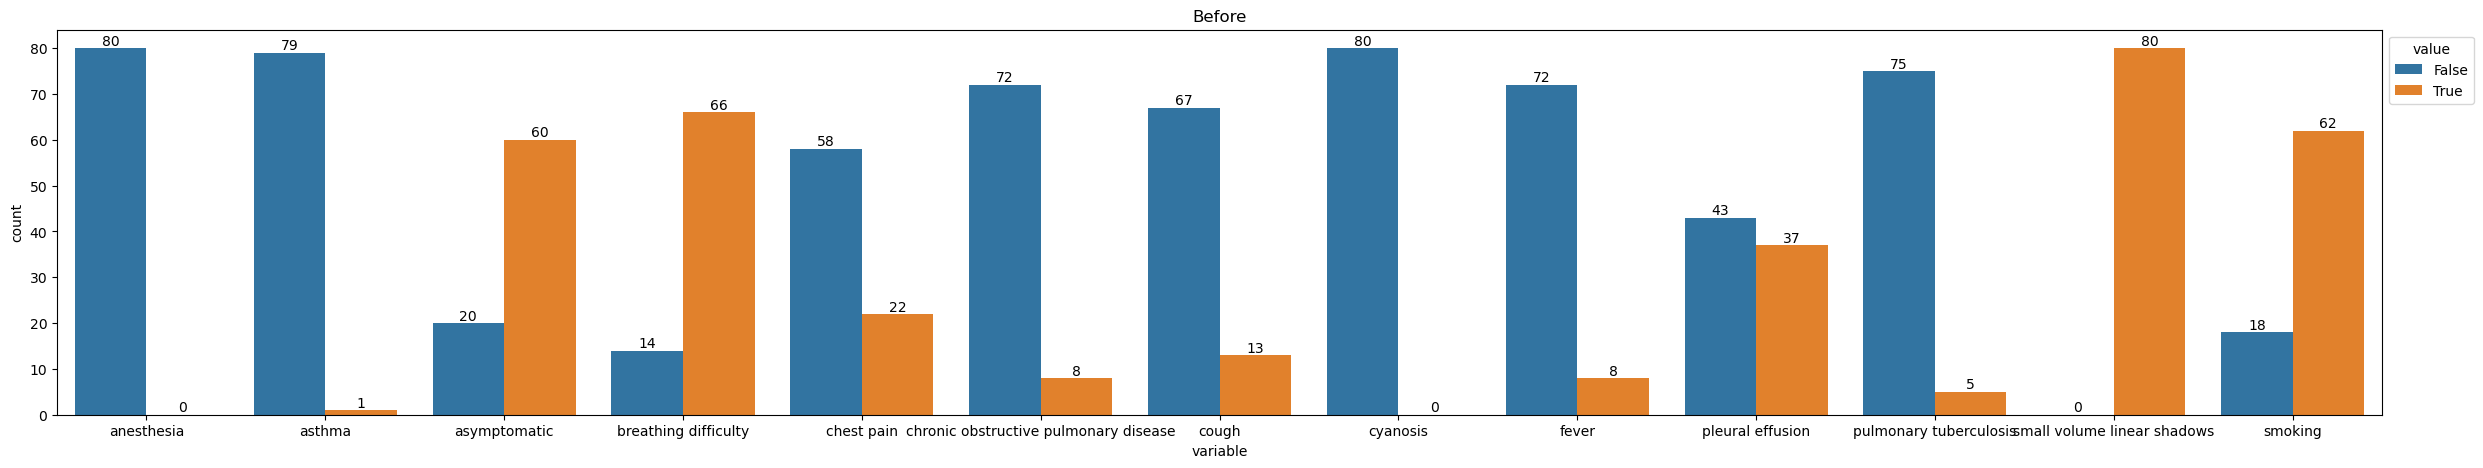

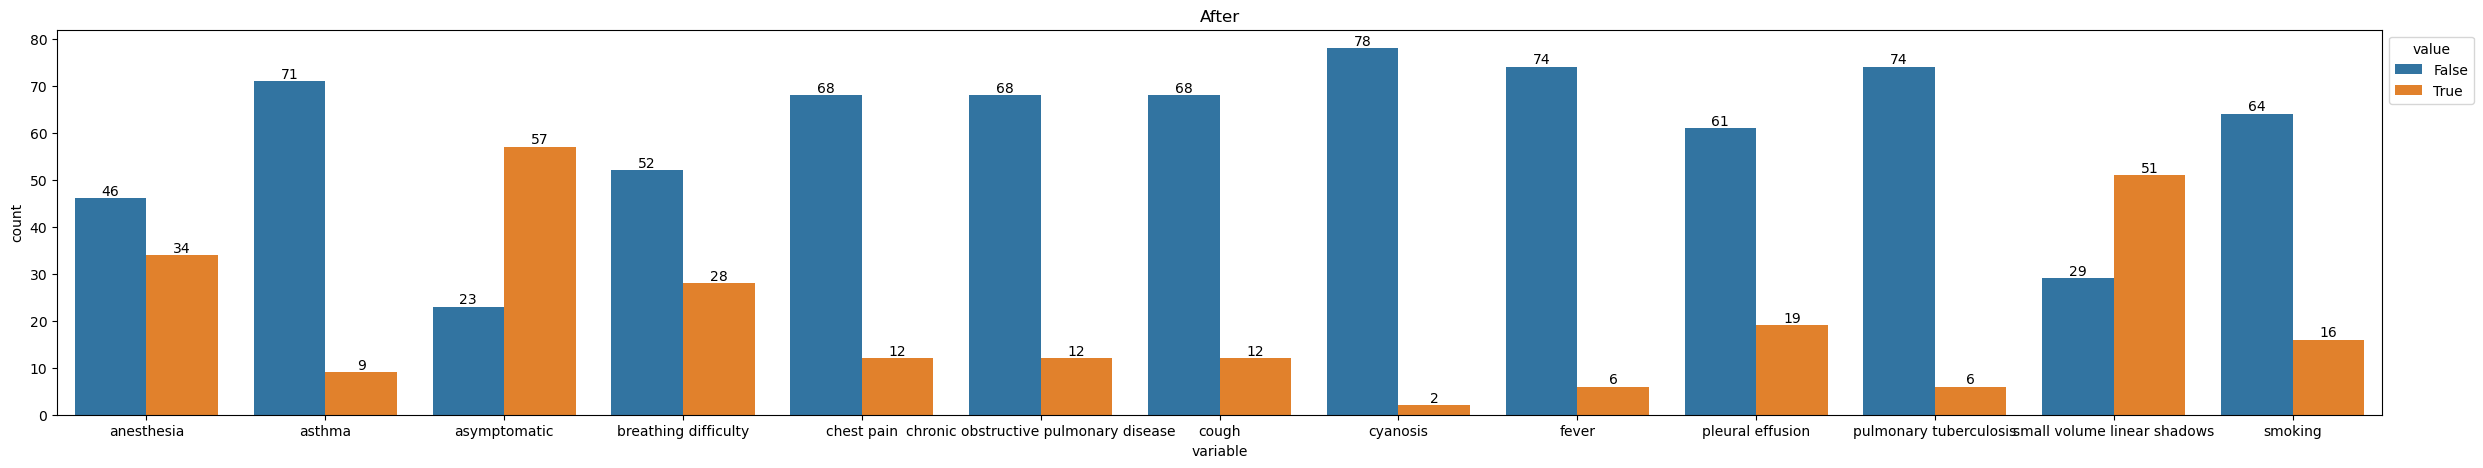

In [24]:
for res_type in list(merged_df['res_type'].value_counts().keys()):
    t_df = merged_df[merged_df['res_type'] == res_type][identified_keywords['boolean']]

    # for col in identified_keywords['boolean']:
        # plt.figure(figsize=(10,5))
        # ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis")
        # ax = sns.countplot(data=merged_df,  x="res_type", hue=col)
    plt.figure(figsize=(30,5))
    ax = sns.countplot(data=pd.melt(t_df), x='variable', hue='value')
    ax.set_title(res_type)
    for container in ax.containers:
        ax.bar_label(container)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))